**Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.**

Answer:
Boosting is an ensemble learning technique that combines multiple weak learners (e.g., shallow decision trees) sequentially to create a strong learner. Each new model focuses on correcting the mistakes of the previous ones.

How it works:

Start with a weak learner.

Identify misclassified samples.

Increase weights for misclassified points.

Train the next weak learner focusing on these hard cases.

Final model combines all learners (weighted voting or averaging).

Improvement of Weak Learners:
Weak learners (~55–60% accuracy) become strong by sequentially reducing errors, lowering bias, and improving generalization.

Examples: AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost.

**Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

Answer:

Feature	AdaBoost	Gradient Boosting
Focus	Reweights misclassified samples	Fits learners to residual errors
Error Handling	Adjusts sample weights	Uses gradient of loss function
Optimization	Weighted voting/averaging	Gradient descent on loss
Flexibility	Works mainly for classification	Works for classification & regression

In short:

AdaBoost → focuses on misclassified samples.

Gradient Boosting → focuses on residual errors via gradient descent.

**Question 3: How does regularization help in XGBoost?**

Answer:
XGBoost minimizes:

𝑂
𝑏
𝑗
=
𝐿
𝑜
𝑠
𝑠
(
predictions
,
actual
)
+
Ω
(
Tree
)
Obj=Loss(predictions,actual)+Ω(Tree)

Where

Ω
(
𝑇
)
=
𝛾
𝑇
+
1
2
𝜆
∑
𝑤
𝑗
2
Ω(T)=γT+
2
1
	​

λ∑w
j
2
	​


L1 Regularization (α): Forces leaf weights to zero (feature selection).

L2 Regularization (λ): Shrinks leaf weights (stability).

γ (Gamma): Penalty for adding new leaf (controls tree complexity).

Benefits: Prevents overfitting, improves generalization, encourages sparsity, and ensures stable predictions.

**Question 4: Why is CatBoost considered efficient for handling categorical data?**

Answer:

Most models require One-Hot Encoding or Label Encoding.

CatBoost uses Ordered Target Statistics: replaces categories with target-based statistics computed in a way that avoids target leakage.

Advantages:

Handles categorical features directly.

Avoids exploding feature space (like one-hot).

Works well with high-cardinality categories (e.g., ZIP codes).

Prevents target leakage.

 Efficient, accurate, and robust for categorical-heavy datasets.

**Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?**

Answer:
Boosting is preferred in:

Fraud Detection (banking, e-commerce).

Credit Scoring & Loan Risk Modeling.

Online Advertising (CTR prediction).

Healthcare (disease prediction).

Search Engines & Recommendation Systems.

Customer Churn Prediction.

Kaggle Competitions (boosting dominates leaderboards).

 Boosting reduces bias and focuses on hard-to-learn patterns, making it better than bagging for high-stakes tasks.

In [1]:
#Question 6: Python Program – AdaBoost Classifier on Breast Cancer Dataset

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("AdaBoost Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


AdaBoost Accuracy: 97.37%


In [2]:
# Question 7: Gradient Boosting Regressor on California Housing Dataset

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train-test (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# R-squared Score
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting Regressor R² Score on California Housing Dataset: {:.4f}".format(r2))


Gradient Boosting Regressor R² Score on California Housing Dataset: 0.8004


In [3]:
# Question 8: XGBoost Classifier with GridSearchCV on Breast Cancer Dataset

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for learning_rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Train
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("XGBoost Classifier Accuracy with Best Learning Rate: {:.2f}%".format(accuracy * 100))


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:15:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.2}
XGBoost Classifier Accuracy with Best Learning Rate: 95.61%


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00
CatBoost Classifier Accuracy: 96.49%


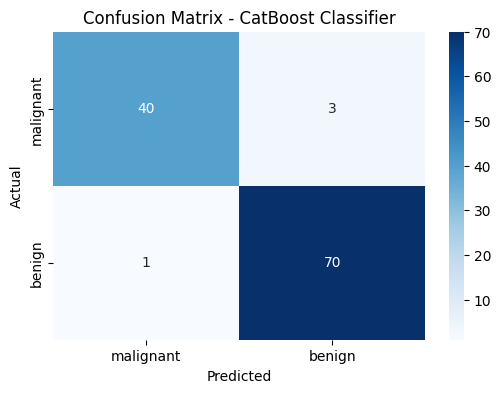

In [7]:
# Question 9: CatBoost Classifier with Confusion Matrix Plot
!pip install catboost
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost Classifier
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("CatBoost Classifier Accuracy: {:.2f}%".format(acc * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


**Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:**

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model

Answer:
Step 1: Data Preprocessing

Handle Missing Values

Numeric features:

Impute using median (robust to outliers).

Or use model-based imputation (e.g., KNNImputer).

Categorical features:

Impute with a special category (e.g., "Missing") so the model can learn if missingness has meaning.

Feature Encoding

If using XGBoost/AdaBoost:

Apply One-Hot Encoding (for low-cardinality categorical features).

Apply Target / Frequency Encoding (for high-cardinality categorical features like ZIP codes).

If using CatBoost:

Pass categorical features directly (CatBoost handles them internally).

Scaling

Not strictly required for boosting, since tree-based models are scale-invariant.

Step 2: Choice of Algorithm

AdaBoost

Works well on simple, clean datasets with less noise.

Not the best choice here (dataset is imbalanced + categorical-heavy).

XGBoost

Handles missing values natively (np.nan treated as a split option).

Powerful, widely used in FinTech.

But categorical handling needs preprocessing.

CatBoost  Best choice here

Handles missing values + categorical features natively.

Avoids target leakage with ordered target statistics.

Robust on imbalanced financial data.

Final Choice: CatBoost (or XGBoost if categorical preprocessing is allowed).

Step 3: Hyperparameter Tuning Strategy

Use RandomizedSearchCV or Bayesian Optimization (faster than GridSearch on large datasets).

Key hyperparameters:

learning_rate → controls step size (0.01–0.2).

depth → tree depth (4–10).

iterations → number of boosting rounds.

l2_leaf_reg (CatBoost) / reg_lambda (XGBoost) → regularization.

scale_pos_weight → to handle imbalanced dataset.

Step 4: Evaluation Metrics

Since the dataset is imbalanced, accuracy is misleading.
Use:

Precision → How many predicted defaults were actually defaults.

Recall (Sensitivity) → How many actual defaults were caught.

F1-score → Balance between precision and recall.

ROC-AUC → Measures ability to rank defaults higher than non-defaults.

PR-AUC (Precision-Recall AUC) → More informative for imbalanced data.

Business-wise, Recall is critical (missing a default is costly).

Step 5: Business Benefits

Risk Reduction → Identify high-risk borrowers early → minimize loan defaults.

Profit Maximization → Approve more low-risk borrowers → increase revenue safely.

Customer Segmentation → Tailor loan offers (e.g., higher interest for borderline risky borrowers).

Regulatory Compliance → Explainable boosting models (SHAP values) → meet compliance requirements.

Operational Efficiency → Automates loan approval process, reducing manual workload.